In [7]:
# on-set = {}, n_iteration = 1
# f = (x1)(x1')
from qiskit import *
import numpy as np
%matplotlib inline

def initialize(cir):
    cir.x(1)
    cir.x(2)
    cir.x(3)
    cir.h(1)
    cir.h(2)
    cir.h(3)

def oracle(cir):
    # computation
    cir.cx(1, 4) # clause C1 = (x1)
    cir.x(1)
    cir.cx(1, 5) # clause C2 = (x1')
    cir.ccx(4, 5, 0)
    cir.z(0)
    # uncomputation
    cir.ccx(4, 5, 0)
    cir.cx(1, 5)
    cir.x(1)
    cir.cx(1, 4)

def diffusion(cir):
    cir.h(1)
    cir.h(2)
    cir.ccx(1, 2, 3)
    cir.h(1)
    cir.h(2)

n_iterations = 1
cir = QuantumCircuit(6, 3) # 0: result qubit, 1~3: vars, 4~5: clauses
initialize(cir)
for i in range(n_iterations):
    oracle(cir)
    diffusion(cir)

cir.barrier(range(1, 4))
cir.measure(range(1, 4), range(0, 3))
cir.draw()

{'011': 114, '101': 133, '000': 120, '010': 126, '111': 119, '001': 132, '100': 139, '110': 141}


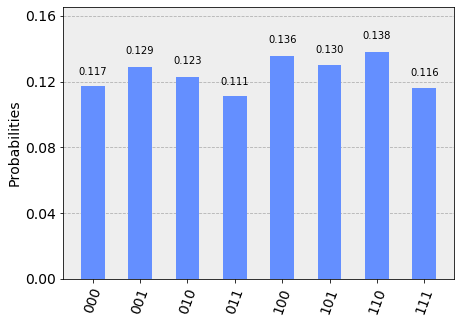

In [8]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(cir, simulator, shots = 1024)
result = job.result()

counts = result.get_counts(cir)
print(counts)
visualization.plot_histogram(counts)